In [28]:
#import library
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')

In [30]:
url = "https://www.mohfw.gov.in/"
response = requests.get(url).content
soup = BeautifulSoup(response, 'html.parser')

In [31]:
header = ['SNo', 'Name of State_and_UT','Total_Confirmed_cases','Cured','Death']

In [32]:
all_rows = soup.find_all('tr')

In [33]:
data = pd.DataFrame(columns = header )
for row in all_rows[1:-6]:
    ro=[]
    for i in row.find_all('td'):
        ro.append(i.string)
    #print(ro)
    length = len(data)
    data.loc[length] = ro

In [34]:
data.tail()

,SNo,Name of State_and_UT,Total_Confirmed_cases,Cured,Death
28,29,Telengana,1597,1000,35
29,30,Tripura,167,85,0
30,31,Uttarakhand,93,52,1
31,32,Uttar Pradesh,4605,2783,118
32,33,West Bengal,2825,1006,244


In [35]:
data.Total_Confirmed_cases = data.Total_Confirmed_cases.apply(lambda x: int(x))
data.Cured = data.Cured.apply(lambda x: int(x))
data.Death = data.Death.apply(lambda x: int(x))

In [36]:
data['Acitve_Cases']=data.Total_Confirmed_cases-data.Cured-data.Death

In [37]:
data.head()

,SNo,Name of State_and_UT,Total_Confirmed_cases,Cured,Death,Acitve_Cases
0,1,Andaman and Nicobar Islands,33,33,0,0
1,2,Andhra Pradesh,2474,1552,50,872
2,3,Arunachal Pradesh,1,1,0,0
3,4,Assam,107,41,2,64
4,5,Bihar,1391,494,9,888


In [38]:
sorted_data=data.sort_values(by='Total_Confirmed_cases',ascending=False)

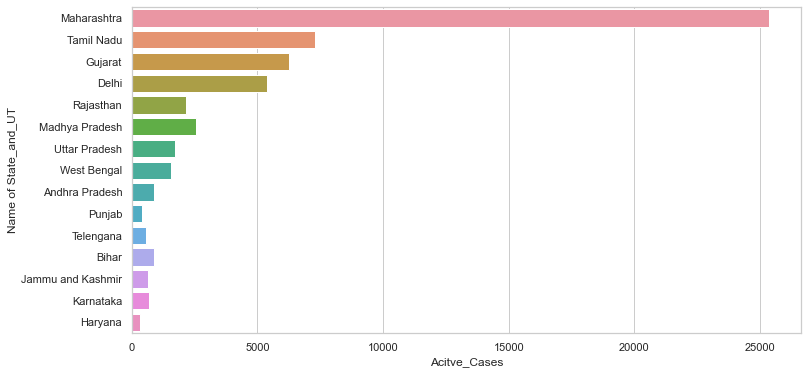

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(x='Acitve_Cases',y='Name of State_and_UT', data= sorted_data[:15])

In [40]:
sorted_data

,SNo,Name of State_and_UT,Total_Confirmed_cases,Cured,Death,Acitve_Cases
19,20,Maharashtra,35058,8437,1249,25372
27,28,Tamil Nadu,11760,4406,81,7273
10,11,Gujarat,11745,4804,694,6247
8,9,Delhi,10054,4485,168,5401
26,27,Rajasthan,5507,3218,138,2151
18,19,Madhya Pradesh,5236,2435,252,2549
31,32,Uttar Pradesh,4605,2783,118,1704
32,33,West Bengal,2825,1006,244,1575
1,2,Andhra Pradesh,2474,1552,50,872
25,26,Punjab,1980,1547,37,396


In [41]:
data.to_csv('19_May_2020.csv', index=False)

In [42]:
sorted_data[:7]

,SNo,Name of State_and_UT,Total_Confirmed_cases,Cured,Death,Acitve_Cases
19,20,Maharashtra,35058,8437,1249,25372
27,28,Tamil Nadu,11760,4406,81,7273
10,11,Gujarat,11745,4804,694,6247
8,9,Delhi,10054,4485,168,5401
26,27,Rajasthan,5507,3218,138,2151
18,19,Madhya Pradesh,5236,2435,252,2549
31,32,Uttar Pradesh,4605,2783,118,1704


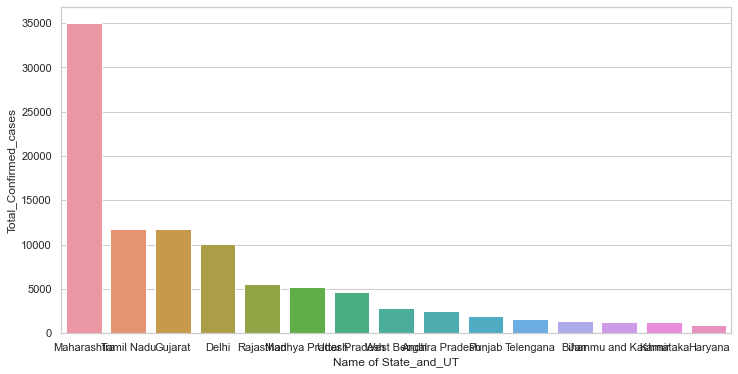

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(x='Name of State_and_UT',y='Total_Confirmed_cases', data= sorted_data[:15])